In [1]:
# Don't display filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import xarray as xr

First ensemble member of CM4 fafantwater experiments: `CM4_piControl_C_fafantwater_251`.

Rest of the output for the other CM4 and ESM4 experiments to be sent as well (in addition to the time periods of overlap for the CM4 and ESM4 piControl runs).

Focus on the time periods 0251-0405 and 0101-0270 for CM4 and ESM4, respectively.

#### CM4
|      Variables     |        piControl            | fafstress (251) | fafantwater (251)| fafantwaterstress (251)|
| :-----------------:| :-------------------        | :-------        | :-------         |  :------------         |
| surface fluxes$^1$ | 025101-042012               |000101-010012    |000101-010012     |   000101-010012        |
| `MLD_restrat`      | 025101-039512, 040101-040512|  *missing*      |  *missing*       |    *missing*           |
| `siconc`           | 025101-039512, 040101-040512|000101-010012    |000101-010012     |   000101-010012        |
| 3d variables$^2$   | 0251-0395, 0401-0405        |  0001-0100      |  0001-0100       |     0001-0100          |
| `agessc`           | 0201-0500                   |  0001-0100      |  0001-0100       |     0001-0100          |

#### ESM4
|      Variables     |        piControl            | fafstress (101) | fafantwater (101)| fafantwaterstress (101)|
| :-----------------:| :-------------------        | :-------        | :-------         |  :------------         |
| surface fluxes$^1$ | 010101-030012               | 010101-018512   | 010101-017512    |  010101-018012         |
| `MLD_restrat`      | 010101-027012               |  *missing*      |  *missing*       |  *missing*             |
| `siconc`           | 010101-027012               | 010101-018512   | 010101-017512    |  010101-018012         |
| 3d variables$^2$   | 0101-0270                   |  0101-0185      |  0101-0175       |     0101-0180          |
| `agessc`           | 0101-0300                   |  0101-0185      |  0101-0175       |     0101-0180          |

1. **surface fluxes**: `evs`, `ficeberg`, `friver`, `heat_content_surfwater`, `hfds`, `hflso`, `hfsifrazil`, `hfsso`, `prlq`, `prsn`, `rlntds`, `rsntds`, `sfdsi`, `sos`, `tos`, `wfo`
1. **3d variables**: `so`, `thetao`, `umo`, `vmo`, `volcello`

In [3]:
ls '/scratch/gpfs/jt7058/GFDL/fafmip/raw/ESM4_piControl_D_fafantwater_201/'

ocean_annual_rho2/  ocean_annual_z/  ocean_annual_z_agessc/  ocean_monthly/


In [4]:
ls '/scratch/gpfs/jt7058/GFDL/fafmip/zarr/ESM4/'

antwater/  antwaterstress/  control/  stress/


In [5]:
ls '/scratch/gpfs/jt7058/GFDL/fafmip/zarr/ESM4/antwater'

101/  151/  201/


In [6]:
ls '/scratch/gpfs/jt7058/GFDL/fafmip/zarr/ESM4/antwater/201'

annual/  monthly/


In [8]:
rootdir = '/scratch/gpfs/jt7058/GFDL/fafmip/raw/'
exp_dir = 'ESM4_piControl_D_fafantwater_201'
#pp = 'ocean_annual_z'
pp = 'ocean_monthly'

# Load data
ds_om = xr.open_mfdataset(rootdir+exp_dir+'/'+pp+'/'+pp+'.*.*.nc',use_cftime=True, 
                          drop_variables=['average_DT','average_T1','average_T2'])

## Add sea ice when pp = 'ocean_monthly'
#ds_si = xr.open_mfdataset(rootdir+exp_dir+'/'+pp+'/ice.*.*.nc',use_cftime=True, 
#                          drop_variables=['average_DT','average_T1','average_T2'])
#ds_om['siconc'] = ds_si.siconc.rename({'xT':'xh','yT':'yh'}).reset_coords(drop=True)

In [9]:
print(str(ds_om.time.values[0])[:10],'to',str(ds_om.time.values[-1])[:10],'\n',ds_om.dims)

0001-01-16 to 0100-12-16 
 Frozen({'time': 1200, 'yh': 576, 'xh': 720, 'nv': 2})


In [10]:
ds_om

<xarray.Dataset>
Dimensions:                 (time: 1200, yh: 576, xh: 720, nv: 2)
Coordinates:
  * nv                      (nv) float64 1.0 2.0
  * time                    (time) object 0001-01-16 12:00:00 ... 0100-12-16 ...
  * xh                      (xh) float64 -299.8 -299.2 -298.8 ... 59.25 59.75
  * yh                      (yh) float64 -77.91 -77.72 -77.54 ... 89.68 89.89
Data variables: (12/18)
    MLD_restrat             (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    time_bnds               (time, nv) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    evs                     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    ficeberg                (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    friver                  (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    heat_content_surfwater  (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    ...                      ...
    rlntds                  (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    rsntds                  (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    sfdsi                   (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    sos                     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    tos                     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
    wfo                     (time, yh, xh) float32 dask.array<chunksize=(60, 576, 720), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly.000101-000512.MLD_restrat.nc
    title:               ESM4_piControl_D_fafantwater_201
    associated_files:    areacello: 00010101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [11]:
list(ds_om.keys())

['MLD_restrat',
 'time_bnds',
 'evs',
 'ficeberg',
 'friver',
 'heat_content_surfwater',
 'hfds',
 'hflso',
 'hfsifrazil',
 'hfsso',
 'prlq',
 'prsn',
 'rlntds',
 'rsntds',
 'sfdsi',
 'sos',
 'tos',
 'wfo']

In [12]:
# Monthly
#.sel(time=slice('0101','0270')) # ESM4 (control)
#.sel(time=slice('0251','0395')) # CM4 (control)
ds = ds_om[['tos','sos',
            'hfds','wfo','sfdsi',
            'hflso','hfsso','rlntds','rsntds','heat_content_surfwater','hfsifrazil',
            'prlq','prsn','evs','friver','ficeberg','MLD_restrat']] #,'siconc','MLD_restrat'

In [11]:
# Annual
#ds = ds_om[['thetao','so','agessc','volcello','umo','vmo']].sel(time=slice('0251','0395')) # CM4 (control)
#ds = ds_om[['thetao','so','agessc','volcello','umo','vmo']].sel(time=slice('0101','0270')) # ESM4 (control)
ds = ds_om[['thetao','so','agessc','volcello','umo','vmo']] # CM4/ESM4 (experiments)

In [13]:
def rechunk(ds):
    for varname in list(ds.data_vars):
        chunks = {}
        for (dim,size) in zip(ds[varname].dims,ds[varname].shape):
            if dim in ['time','time_bnds']:
                chunks[dim] = 1
            else:
                chunks[dim] = size
        ds[varname] = ds[varname].chunk(chunks=chunks)
    
    return ds

In [14]:
ds = rechunk(ds)

In [15]:
#ds['time_bnds'] = ds_om.time_bnds.sel(time=slice('0251','0395')).chunk({'time': -1}) # CM4 
#ds['time_bnds'] = ds_om.time_bnds.sel(time=slice('0101','0270')).chunk({'time': -1}) # ESM4 

ds['time_bnds'] = ds_om.time_bnds.chunk({'time': -1}) #experiments

In [16]:
ds

<xarray.Dataset>
Dimensions:                 (time: 1200, yh: 576, xh: 720, nv: 2)
Coordinates:
  * time                    (time) object 0001-01-16 12:00:00 ... 0100-12-16 ...
  * xh                      (xh) float64 -299.8 -299.2 -298.8 ... 59.25 59.75
  * yh                      (yh) float64 -77.91 -77.72 -77.54 ... 89.68 89.89
  * nv                      (nv) float64 1.0 2.0
Data variables: (12/18)
    tos                     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    sos                     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    hfds                    (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    wfo                     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    sfdsi                   (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    hflso                   (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    ...                      ...
    prsn                    (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    evs                     (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    friver                  (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    ficeberg                (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    MLD_restrat             (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    time_bnds               (time, nv) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly.000101-000512.MLD_restrat.nc
    title:               ESM4_piControl_D_fafantwater_201
    associated_files:    areacello: 00010101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_variables:  areacello

In [17]:
# Size (GB)
ds.nbytes/1e9

33.841191184

### Save

In [3]:
import os
from dask.diagnostics import ProgressBar

In [19]:
outdir = '/scratch/gpfs/jt7058/GFDL/fafmip/zarr'
mod = 'ESM4' # CM4, ESM4
exp = 'antwater' # control, stress, antwater, antwaterstress
mem = '201'
freq = 'monthly' # monthly, annual

zarr_path = os.path.join(outdir,mod,exp) if exp=='control' else os.path.join(outdir,mod,exp,mem)

In [20]:
if os.path.exists(zarr_path):
    print(zarr_path)

/scratch/gpfs/jt7058/GFDL/fafmip/zarr/ESM4/antwater/201


In [23]:
ls /scratch/gpfs/jt7058/GFDL/fafmip/zarr/ESM4/antwater/201

annual/


In [24]:
if os.path.exists(zarr_path):
    print('Save to existing directory:', zarr_path)
else:
    print('Create directory:', zarr_path)
    os.makedirs(zarr_path)

Save to existing directory: /scratch/gpfs/jt7058/GFDL/fafmip/zarr/ESM4/antwater/201


In [25]:
with ProgressBar():
    ds.to_zarr(os.path.join(zarr_path,freq))

[########################################] | 100% Completed | 10.5s
[########################################] | 100% Completed | 11.5s
[########################################] | 100% Completed |  1min 50.6s


### Check output

In [4]:
import sys
sys.path.append('../scripts')
from preprocessing import preprocessing
from compute import horizontal_mean
from plot import cartopy_map_so

In [24]:
import cmocean.cm as cmo
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
ds = xr.open_zarr(os.path.join(zarr_path,freq))

In [26]:
pp = 'ocean_monthly'

if mod == 'CM4':
    grid = xr.open_dataset(rootdir+'CM4_piControl_C/'+pp+'/'+pp+'.static.nc')
elif mod == 'ESM4':
    grid = xr.open_dataset(rootdir+'ESM4_piControl_D/'+pp+'/'+pp+'.static.nc')
else:
    print('grid is not available for '+mod)

In [27]:
ds = preprocessing(ds,grid,verbose=False)

In [28]:
# Weddell
west, east, south, north = -60, 30, -78, -50
patch = {'Weddell': [east, south, west, south, west, north, east, north]}

#### Annual output

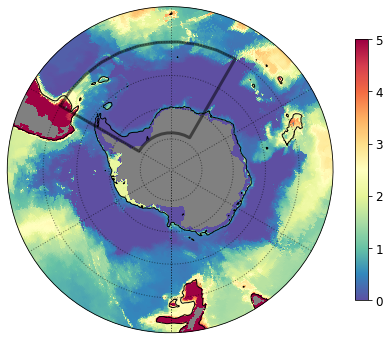

In [27]:
fig = cartopy_map_so(ds.isel(time=-1).ffill('lev').isel(lev=-1),'thetao', lat=-40, fsize=[8,6],
                     drawGrid=True, patch=patch, cmap='Spectral_r',vrange=[0,5])

In [29]:
bottomT = ds.ffill('lev').isel(lev=-1).sel(y=slice(south,north),x=slice(west,east))['thetao']

In [30]:
with ProgressBar():
    bottomT_wed = horizontal_mean(bottomT,ds.sel(y=slice(south,north),x=slice(west,east))).load()

[########################################] | 100% Completed | 24.1s


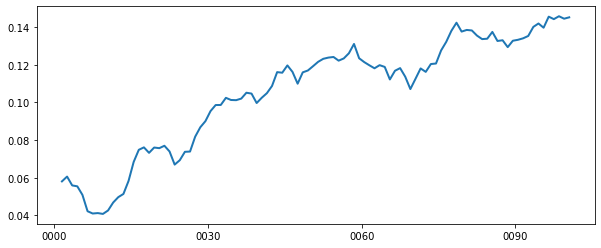

In [31]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(bottomT_wed.time, bottomT_wed, linestyle='-', lw=2, label='bottomT')
plt.show()

#### Monthly output

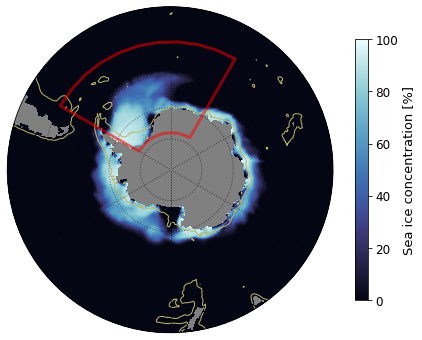

In [32]:
# Sea ice (monthly)
fig = cartopy_map_so(ds.isel(time=-1), 'siconc', lat=-40, fsize=[8,6], drawGrid=True, cmap=cmo.ice,vrange=[0,100],
                     patch=patch, pcol='r',bcol='darkkhaki',cb_label = 'Sea ice concentration [%]')

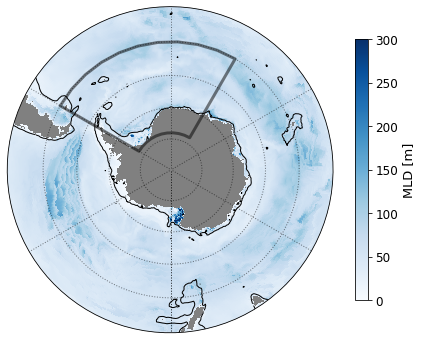

In [29]:
# MLD (monthly)
fig, ax = cartopy_map_so(ds.isel(time=-1), 'MLD_restrat',lat=-40, fsize=[8,6], drawGrid=True,
                         vrange=[0,300], cb_label = 'MLD [m]',cmap='Blues',patch=patch)

In [31]:
mld = ds.sel(y=slice(south,north),x=slice(west,east)).MLD_restrat
#siconc = ds.sel(y=slice(south,north),x=slice(west,east)).siconc
areacello = ds.sel(y=slice(south,north),x=slice(west,east)).areacello

In [32]:
with ProgressBar():
    #si_area_wed = areacello.where(siconc>0.1).sum(dim=['y','x']).load()
    mld_wed = horizontal_mean(mld,ds.sel(y=slice(south,north),x=slice(west,east))).load()

[########################################] | 100% Completed |  4.8s


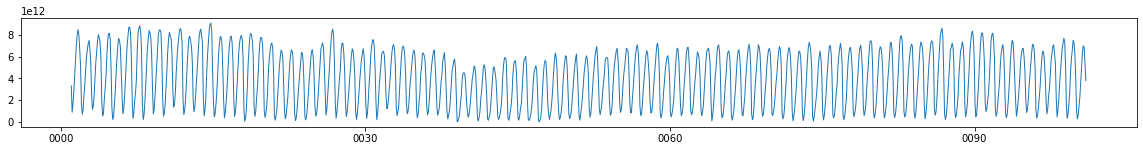

In [32]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(si_area_wed.time, si_area_wed, linestyle='-', lw=1, label='Sea ice area (Weddell)')
plt.show()

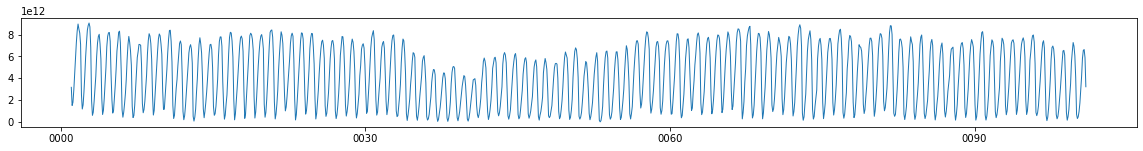

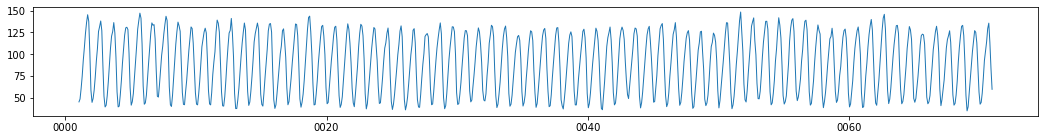

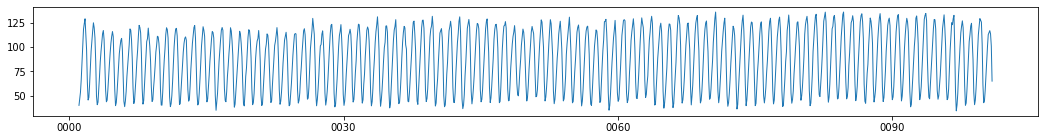

In [33]:
fig, ax = plt.subplots(figsize=(18,2))
ax.plot(mld_wed.time, mld_wed, linestyle='-', lw=1, label='MLD (Weddell)')
plt.show()